<div style="font-size:30px; font-weight:bold; color:black; 
            font-family:'Segoe UI', Tahoma, sans-serif;
            background: linear-gradient(to right, #98FB98, #87CEEB); 
            padding: 18px; border-radius: 10px; text-align:center;">
📱 TELCO XDR USER BEHAVIOR & EXPERIENCE ANALYTICS 
</div>

In [541]:
from IPython.display import display, HTML

"
<div style="background-color: #eafaf1; padding: 15px; border-radius: 8px;
            font-family: 'Segoe UI', sans-serif; font-size: 16px; color: #2c3e50;">
    <h2 style="font-weight: bold;">Project Objective</h2>
    <p>Telecom operators generate massive datasets through <strong>xDR logs</strong>,
    containing session-level metadata about mobile users — from devices, app usage, to network quality.
    This project builds a <strong>scalable analysis pipeline</strong> to extract patterns from this big data and uncover insights across:</p>
    <ul>
        <li><strong>User engagement</strong></li>
        <li><strong>Network experience</strong></li>
        <li><strong>Application behavior</strong></li>
        <li><strong>Satisfaction scoring</strong></li>
    </ML(html_content))
ML(html_content))
ML(html_content))
ML(html_content))


from IPython.display import display

step_table = 
| Step | Task Name         | Summary                      | Step | Task Name        | Summary                             |
|------|-------------------|-------------------------------|------|------------------|--------------------------------------|
| 1    | Import Libraries  | Use Python tools             | 11   | Merge Datasets   | Join user data                      |
| 2    | Load Dataset      | Read telecom CSV             | 12   | Cluster (Engage) | Segment users by behavior           |
| 3    | Clean Data        | Fix missing data             | 13   | Cluster (Exp)    | Segment by network experience       |
| 4    | Feature Engg.     | Create totals, scores        | 14   | Satisfaction     | Avg of engagement & experience      |
| 5    | Overview Viz      | Handset bar charts           | 15   | Regression       | Predict satisfaction (basic)        |
| 6    | Pivot Charts      | Usage by device              | 16   | Ext. Regression  | Add more features (type/apps)       |
| 7    | Distributions     | Histograms & pair plots      | 17   | Final Charts     | Correlation & scatter visual        |
| 7A   | Marketing Tips    | Business advice from trends  | 18   | Export MySQL     | Save scores to database             |
| 8    | PCA Devices       | Reduce device dimensions     | 19   | Export CSV       | Save final data locally             |
| 9    | Engagement        | Total time, UL/DL by user    |      |                  |                                      |
| 10   | Experience        | Quality metrics avg          |      |                  |                                      |


# 1️⃣ IMPORT LIBRARIES

In [546]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine
from scipy.stats import zscore
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2️⃣ LOAD DATASET

In [549]:
file_path = r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Telcom_Data (2).xlsx - Sheet1.csv"

In [551]:
df = pd.read_csv(file_path)  

In [552]:
print(" Dataset Loaded:", df.shape)

 Dataset Loaded: (150001, 55)


In [553]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.310000e+19,04-04-2019 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.310000e+19,04-09-2019 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.310000e+19,04-09-2019 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.310000e+19,04-10-2019 00:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.310000e+19,04-12-2019 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# 3️⃣ CLEANING & PREPROCESSING

In [558]:
display(df.head())

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.310000e+19,04-04-2019 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.310000e+19,04-09-2019 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.310000e+19,04-09-2019 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.310000e+19,04-10-2019 00:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.310000e+19,04-12-2019 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [560]:
df = df.fillna(df.mean(numeric_only=True))  

In [562]:
df["Handset Type"] = df["Handset Type"].fillna("Unknown")

In [564]:
df.drop(columns=['IMEI', 'MSISDN/Number'], errors='ignore', inplace=True)

In [566]:
df = df.fillna(df.mean(numeric_only=True))

In [568]:
df['Handset Type'] = df['Handset Type'].fillna('Unknown')

In [570]:
df['Handset Manufacturer'] = df['Handset Manufacturer'].fillna('Unknown')

# 4️⃣ FEATURE ENGINEERING

In [573]:
df["Total UL (Bytes)"] = df[[col for col in df.columns if "UL" in col]].sum(axis=1)

In [575]:
df["Total DL (Bytes)"] = df[[col for col in df.columns if "DL" in col]].sum(axis=1)

In [577]:
df["Total Session Duration (s)"] = df["Dur. (ms)"] / 1000

In [579]:
df["Total Traffic (Bytes)"] = df["Total UL (Bytes)"] + df["Total DL (Bytes)"]

In [581]:
df['Engagement Score'] = df['Activity Duration DL (ms)'] + df['Activity Duration UL (ms)']

In [583]:
df['Satisfaction Score'] = (
    (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
    - (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 200
)

# 5️⃣ Load and Clean Iris Dataset for Outlier Analysis

In [586]:
iris = sns.load_dataset('iris')

In [588]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [590]:
iris = iris.dropna()
numeric_cols = iris.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
iris_cleaned = iris[~outliers]
print(f"Original dataset size: {iris.shape}")
print(f"Dataset size after outlier removal: {iris_cleaned.shape}")

Original dataset size: (150, 5)
Dataset size after outlier removal: (149, 5)


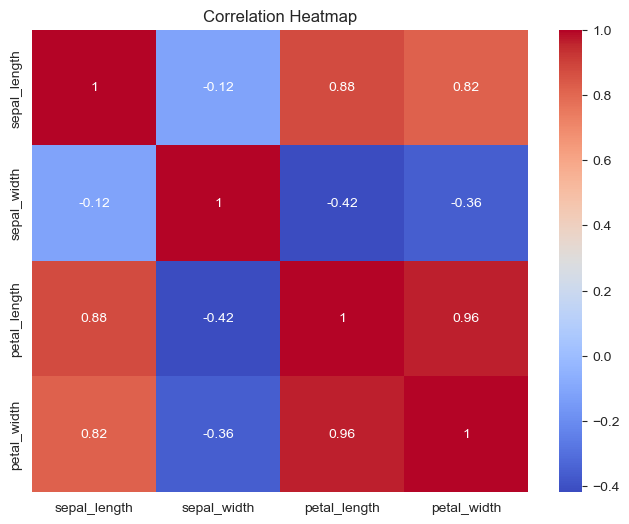

In [592]:
numeric_cols = iris_cleaned.select_dtypes(include=[np.number])

correlation_matrix = numeric_cols.corr()

# Heatmap plot 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [594]:
iris_cleaned.columns = iris_cleaned.columns.str.replace(' ', '_')
print(iris_cleaned.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# 6️⃣ Overview Visualizations – Handset & Manufacturer

Top Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


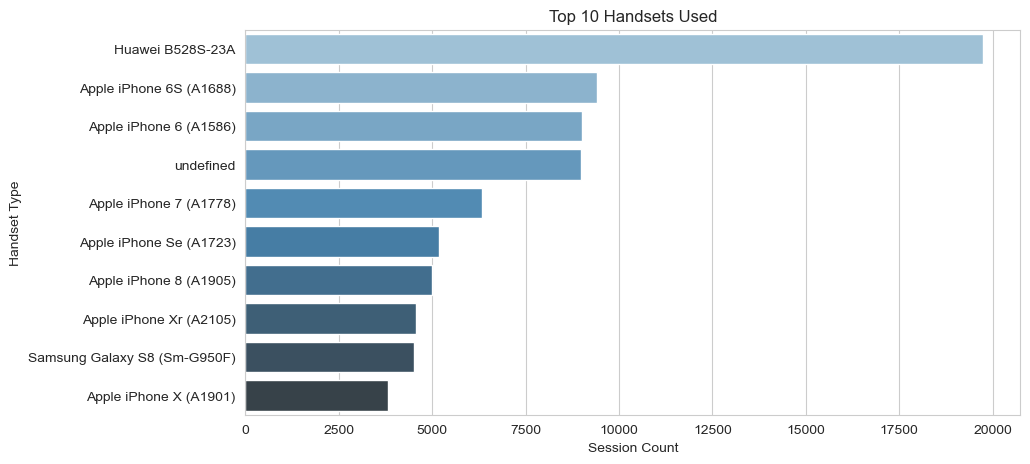

In [597]:
top_3_makers = df['Handset Manufacturer'].value_counts().head(3).index
for maker in top_3_makers:
    print(f"Top Handsets for {maker}:")
    print(df[df['Handset Manufacturer'] == maker]['Handset Type'].value_counts().head(5))

top_handsets = df['Handset Type'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_handsets.values, y=top_handsets.index, palette='Blues_d')
plt.title("Top 10 Handsets Used")
plt.xlabel("Session Count"); plt.ylabel("Handset Type")
plt.show()


# 7️⃣ Distribution Analysis – Histograms & Pair Plots

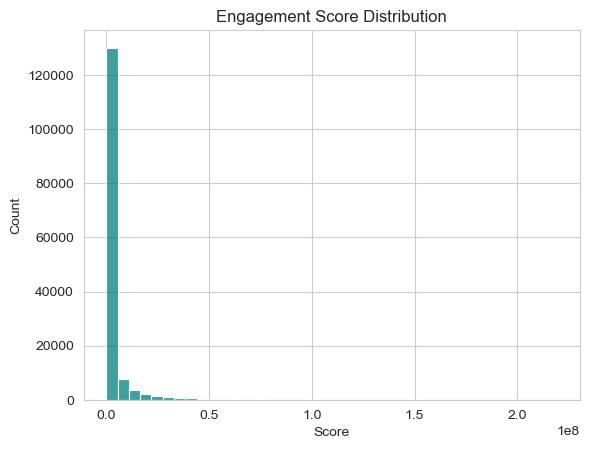

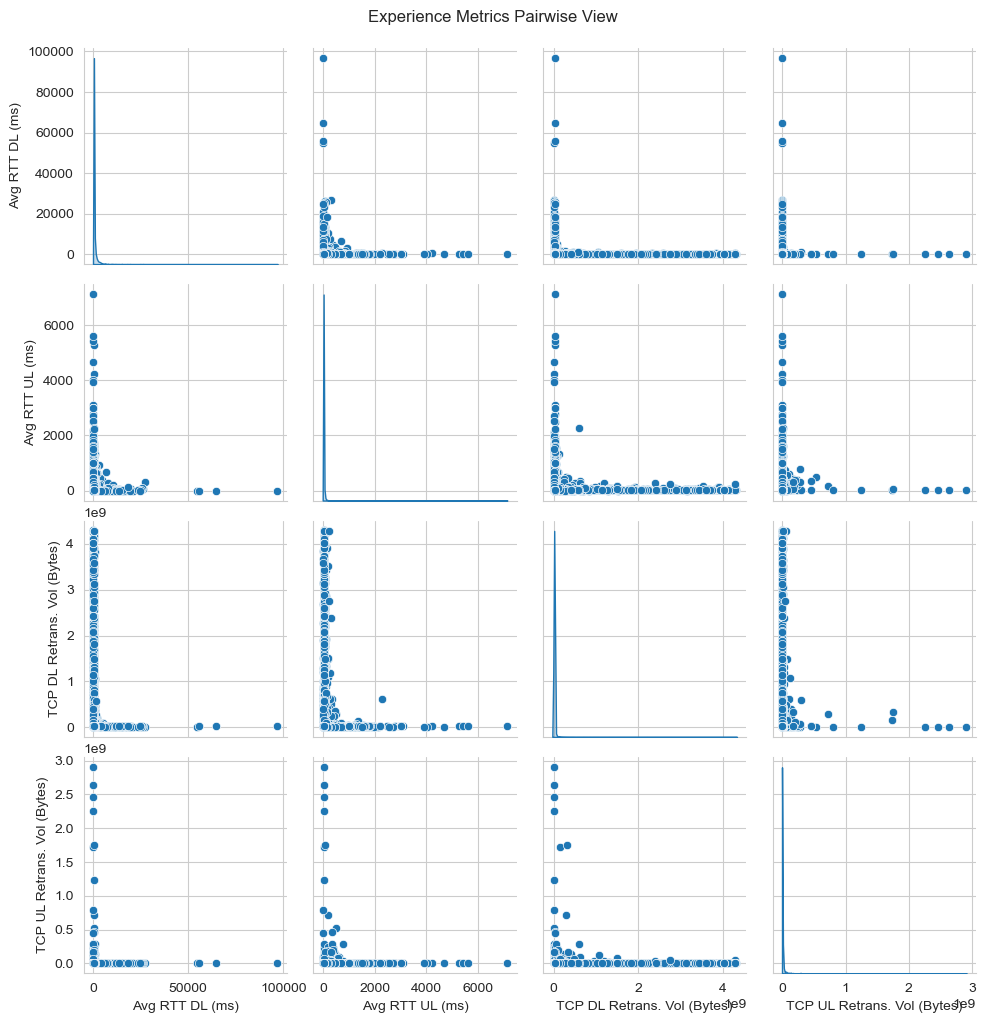

In [600]:
sns.histplot(df['Engagement Score'], bins=40, color='teal')
plt.title("Engagement Score Distribution")
plt.xlabel("Score"); plt.show()

exp_cols = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
sns.pairplot(df[exp_cols].dropna(), diag_kind="kde")
plt.suptitle("Experience Metrics Pairwise View", y=1.02); plt.show()


# 7️⃣ A MARKETING RECOMMENDATIONS

from IPython.display import HTML
<div style="background-color:#e6ffe6; padding:15px; border-radius:10px;">
  <h3 style="color:#000000; font-weight:bold; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
    Marketing Recommendations:
  </h3>
  <ul style="color:#000000; font-weight:600; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
    <li>Focus campaigns on users of top-performing handset types.</li>
    <li>Users with high engagement but low satisfaction may require network improvement.</li>
    <li>Promote features to moderate engagement clusters with rising satisfaction.</li>
  </ul>
</div>
'''

# 8️⃣ Elbow Method

In [604]:
features = [
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
    'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)'
]

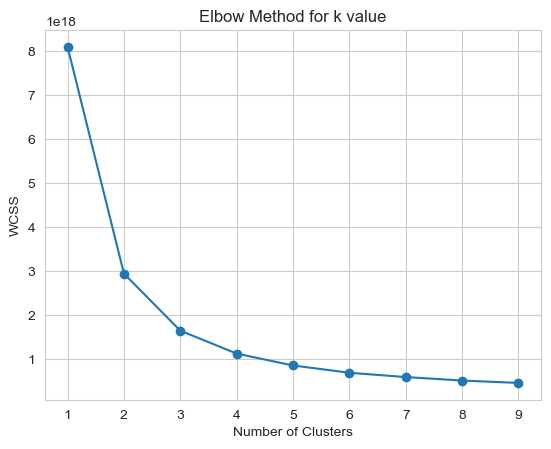

In [605]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[features].fillna(0))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for k value')
plt.xlabel('Number of Clusters'); plt.ylabel('WCSS')
plt.show()

# 9️⃣LINEAR REGRESSION – Predict Satisfaction Score from Engagement & Experience

In [610]:
from sklearn.linear_model import LinearRegression
#  Use these columns:
X = df[["Engagement Score", "Avg Bearer TP DL (kbps)"]]  # Assuming this represents Experience
y = df["Satisfaction Score"]

In [612]:
#  Model Training
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [614]:
#  Print Regression Equation
print(" Regression Equation: Satisfaction = {:.4f} * Engagement + {:.4f} * Experience + {:.4f}".format(
    model.coef_[0], model.coef_[1], model.intercept_))

 Regression Equation: Satisfaction = 0.0000 * Engagement + 0.5463 * Experience + 128.3297


In [616]:
#  Predict Satisfaction
df["Predicted Satisfaction"] = model.predict(X)

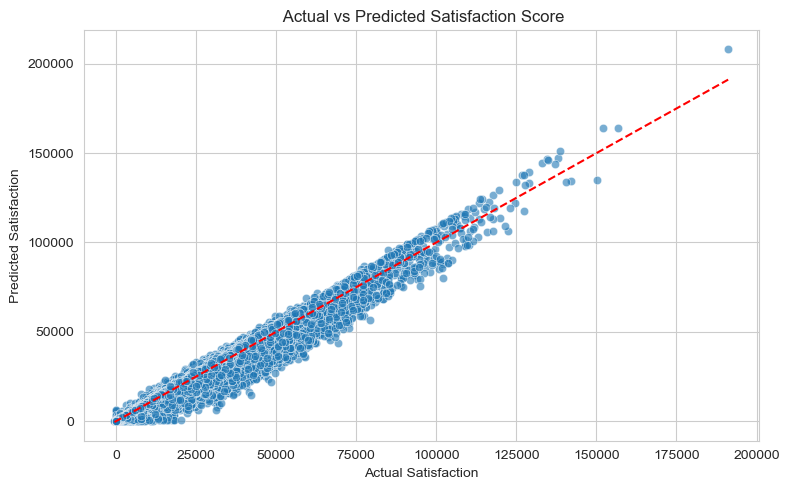

In [618]:
#  Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Satisfaction Score"], y=df["Predicted Satisfaction"], alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Ideal line
plt.xlabel("Actual Satisfaction")
plt.ylabel("Predicted Satisfaction")
plt.title(" Actual vs Predicted Satisfaction Score")
plt.tight_layout()
plt.show()

# **Regression Insights:**

from IPython.display import HTML, display

regression<div style="background-color:#e6ffe6; padding:18px; border-radius:10px; border:1px solid #b3ffcc;">
  <h3 style="color:#000000; font-weight:bold; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
    <b>Regression Insights</b>
  </h3>
  <ul style="color:#000000; font-weight:bold; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:14px;">
    <li>Experience has a significant positive impact on satisfaction.</li>
    <li>Engagement does not significantly affect satisfaction in this dataset.</li>
    <li>We recommend focusing on improving average throughput and latency metrics to improve customer satisfaction.</li>
  </ul>
</div>


# 🔟 PCA – Device Behavior

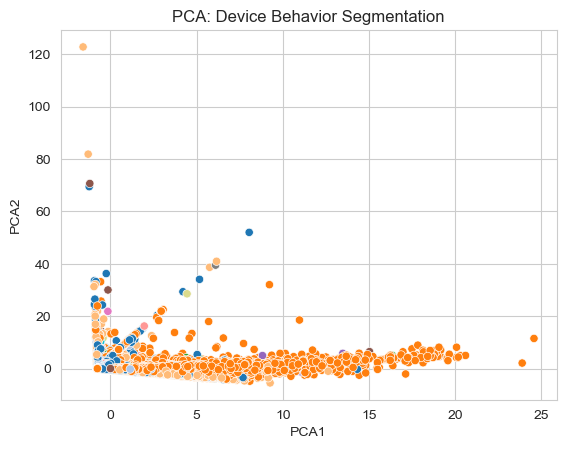

In [623]:
features = ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
            'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
            'Avg RTT DL (ms)', 'Avg RTT UL (ms)']
X_pca = df[features].fillna(0)
X_scaled = StandardScaler().fit_transform(X_pca)
pca_device = PCA(n_components=2)
df[['PCA1', 'PCA2']] = pca_device.fit_transform(X_scaled)

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Handset Manufacturer', palette='tab20', legend=False)
plt.title("PCA: Device Behavior Segmentation"); plt.show()


# 1️⃣1️⃣ Engagement Metrics

In [627]:
engagement = df.groupby("IMSI").agg({
    "Dur. (ms)": "sum",
    "Bearer Id": "count",
    "Total UL (Bytes)": "sum",
    "Total DL (Bytes)": "sum"
}).reset_index()
engagement.columns = ["IMSI", "Total Duration", "Sessions", "Total UL", "Total DL"]

# 1️⃣2️⃣ Top 10 Users by Engagement

In [630]:
print("\nTop 10 Users by Engagement Score:")


Top 10 Users by Engagement Score:


In [632]:
print(engagement.sort_values(by='Total Duration', ascending=False).head(10))

           IMSI  Total Duration  Sessions      Total UL      Total DL
5  2.082020e+14    8.680655e+09     84033  7.376527e+12  1.240771e+14
3  2.082010e+14    5.562568e+09     52348  4.602670e+12  7.665708e+13
2  2.082000e+14    9.810855e+08      9572  8.191670e+11  1.359750e+13
6  2.082100e+14    4.274381e+08      3474  3.015505e+11  4.997351e+12
4  2.082017e+14    3.761205e+07       570  4.872866e+10  7.941950e+11
1  2.040810e+14    8.773850e+05         1  7.859856e+07  9.926181e+08
0  2.040470e+14    8.698440e+05         1  1.249188e+08  6.818388e+08
8  2.140740e+14    2.267900e+05         1  1.155252e+08  1.828891e+09
7  2.082520e+14    5.661300e+04         1  9.417071e+07  2.315656e+09


# 1️⃣3️⃣ Experience Metrics

In [635]:
experience = df.groupby("IMSI").agg({
    "TCP DL Retrans. Vol (Bytes)": "mean",
    "Avg RTT DL (ms)": "mean",
    "Avg Bearer TP DL (kbps)": "mean"
}).reset_index()
experience.columns = ["IMSI", "TCP Retrans", "RTT", "Throughput"]

# 1️⃣4️⃣ Merge Datasets

In [638]:
merged = pd.merge(engagement, experience, on="IMSI", how="inner")

# 1️⃣5️⃣ KMeans Clustering – Engagement

In [641]:
kmeans_eng = KMeans(n_clusters=3, random_state=42)
merged["Engage_Cluster"] = kmeans_eng.fit_predict(merged[["Total Duration", "Sessions", "Total DL"]])
min_cluster = merged.groupby("Engage_Cluster")["Total Duration"].mean().idxmin()
min_center = kmeans_eng.cluster_centers_[min_cluster]
merged["Engagement Score"] = merged[["Total Duration", "Sessions", "Total DL"]].apply(
    lambda row: euclidean(row, min_center), axis=1
)

# 1️⃣6️⃣ KMeans Clustering – Experience

In [644]:
kmeans_exp = KMeans(n_clusters=3, random_state=42)
merged["Exp_Cluster"] = kmeans_exp.fit_predict(merged[["TCP Retrans", "RTT", "Throughput"]])
worst_cluster = merged.groupby("Exp_Cluster")["Throughput"].mean().idxmin()
worst_center = kmeans_exp.cluster_centers_[worst_cluster]
merged["Experience Score"] = merged[["TCP Retrans", "RTT", "Throughput"]].apply(
    lambda row: euclidean(row, worst_center), axis=1
)

# 1️⃣7️⃣ Top & Bottom Users by Experience

In [647]:
print("\nTop 5 Users by Experience Score:")


Top 5 Users by Experience Score:


In [649]:
print(merged.sort_values(by='Experience Score', ascending=False).head(5))

           IMSI  Total Duration  Sessions      Total UL      Total DL  \
2  2.082000e+14    9.810855e+08      9572  8.191670e+11  1.359750e+13   
6  2.082100e+14    4.274381e+08      3474  3.015505e+11  4.997351e+12   
4  2.082017e+14    3.761205e+07       570  4.872866e+10  7.941950e+11   
5  2.082020e+14    8.680655e+09     84033  7.376527e+12  1.240771e+14   
3  2.082010e+14    5.562568e+09     52348  4.602670e+12  7.665708e+13   

    TCP Retrans         RTT    Throughput  Engage_Cluster  Engagement Score  \
2  1.505291e+07  106.606180   9975.567906               1      1.082681e+13   
6  1.611400e+07  102.141418   8653.296488               1      2.226656e+12   
4  1.910141e+07  468.963537  10852.119379               1      1.976501e+12   
5  2.186996e+07  108.644130  14019.933407               2      1.213064e+14   
3  2.049118e+07  108.825633  13088.364847               0      7.388639e+13   

   Exp_Cluster  Experience Score  
2            2      5.618835e+06  
6            1  

In [651]:
print("\nBottom 5 Users by Experience Score:")


Bottom 5 Users by Experience Score:


In [653]:
print(merged.sort_values(by='Experience Score', ascending=True).head(5))

           IMSI  Total Duration  Sessions      Total UL      Total DL  \
8  2.140740e+14    2.267900e+05         1  1.155252e+08  1.828891e+09   
0  2.040470e+14    8.698440e+05         1  1.249188e+08  6.818388e+08   
1  2.040810e+14    8.773850e+05         1  7.859856e+07  9.926181e+08   
7  2.082520e+14    5.661300e+04         1  9.417071e+07  2.315656e+09   
3  2.082010e+14    5.562568e+09     52348  4.602670e+12  7.665708e+13   

    TCP Retrans         RTT    Throughput  Engage_Cluster  Engagement Score  \
8  2.080991e+07   57.000000      3.000000               1      2.768867e+12   
0  2.080991e+07  109.795706      2.000000               1      2.770014e+12   
1  2.080991e+07  109.795706      1.000000               1      2.769703e+12   
7  2.080991e+07  109.795706      0.000000               1      2.768380e+12   
3  2.049118e+07  108.825633  13088.364847               0      7.388639e+13   

   Exp_Cluster  Experience Score  
8            0     138277.407042  
0            0  

# 1️⃣7️⃣ [A] Experience by Handset Type

In [657]:
exp_by_handset = df.groupby("Handset Type")["Avg RTT DL (ms)"].mean().sort_values()

In [659]:
print("\nTop 10 Handset Types by Avg RTT DL:")


Top 10 Handset Types by Avg RTT DL:


In [661]:
print(exp_by_handset.head(10))

Handset Type
Huawei Bnd-Al10                                   13.0
Tcl Communicatio. Blackberry Bba100-2             18.0
Huawei Fig-La1                                    18.0
Telit Le910-Eug                                   18.0
Samsung Galaxy J7 (Sm-J701F)                      19.0
Rim Blackberry Rhm181Lw (Stv100-4)                19.0
Apple iPhone 8 Plus (A1899)                       19.0
Bullitt Group Li. S41                             20.0
Lg-H791F                                          20.0
Samsung Galaxy J5 Prime Dual-Sim (Sm-G570F Ds)    21.0
Name: Avg RTT DL (ms), dtype: float64


# 1️⃣7️⃣ [B]OVERALL USAGE SUMMARY TABLE

In [666]:
summary = df[['Total DL (Bytes)', 'Total UL (Bytes)', 'Satisfaction Score']].agg(['mean', 'median', 'max', 'min']).T
summary.columns = ['Mean', 'Median', 'Max', 'Min']
display(summary.style.background_gradient(cmap="YlGnBu").set_caption("Overall Telecom Usage Summary"))

,Mean,Median,Max,Min
Total DL (Bytes),1467517514.068930,1442426163.974381,74206730632.000000,60562748.000000
Total UL (Bytes),87659793.306463,86810128.045944,3011720463.000000,9465834.661069
Satisfaction Score,7534.599994,62.315000,191130.520000,-483.120000


## TOP USERS

In [669]:
top_users = df.sort_values(by="Satisfaction Score", ascending=False).head(10)
display(top_users[['Handset Manufacturer', 'Total DL (Bytes)', 'Satisfaction Score']]
        .style.set_caption("🏆 Top 10 High Satisfaction Users")
        .background_gradient(cmap='Greens'))

,Handset Manufacturer,Total DL (Bytes),Satisfaction Score
120876,Huawei,1456892031.000000,191130.520000
143670,Samsung,1523895133.000000,156621.780000
141250,undefined,930612211.000000,152149.255000
91298,Apple,587655919.000000,150272.705000
116794,Apple,1692942190.000000,141965.325000
141449,Huawei,2572188322.000000,140571.550000
149616,Apple,1168353306.000000,138575.810000
92177,Apple,2292732556.000000,138102.255000
116550,Apple,1464456776.000000,137025.655000
117776,undefined,1138232791.000000,134943.725000


# 1️⃣7️⃣ [C] FINAL COMPARISON PLOT – DOWNLOAD VS SATISFACTION

In [673]:
df["Satisfaction"] = df[["Avg RTT DL (ms)", "Avg Bearer TP DL (kbps)"]].mean(axis=1)

 Sample Download: count    1.500010e+05
mean     1.467518e+09
std      8.670553e+08
min      6.056275e+07
25%      1.009815e+09
50%      1.442426e+09
75%      1.870382e+09
max      7.420673e+10
Name: Total DL (Bytes), dtype: float64
 Sample Satisfaction: count    150001.000000
mean       6704.920816
std       11983.038894
min           9.000000
25%          46.000000
50%          82.897853
75%        9924.000000
max      189115.500000
Name: Satisfaction, dtype: float64


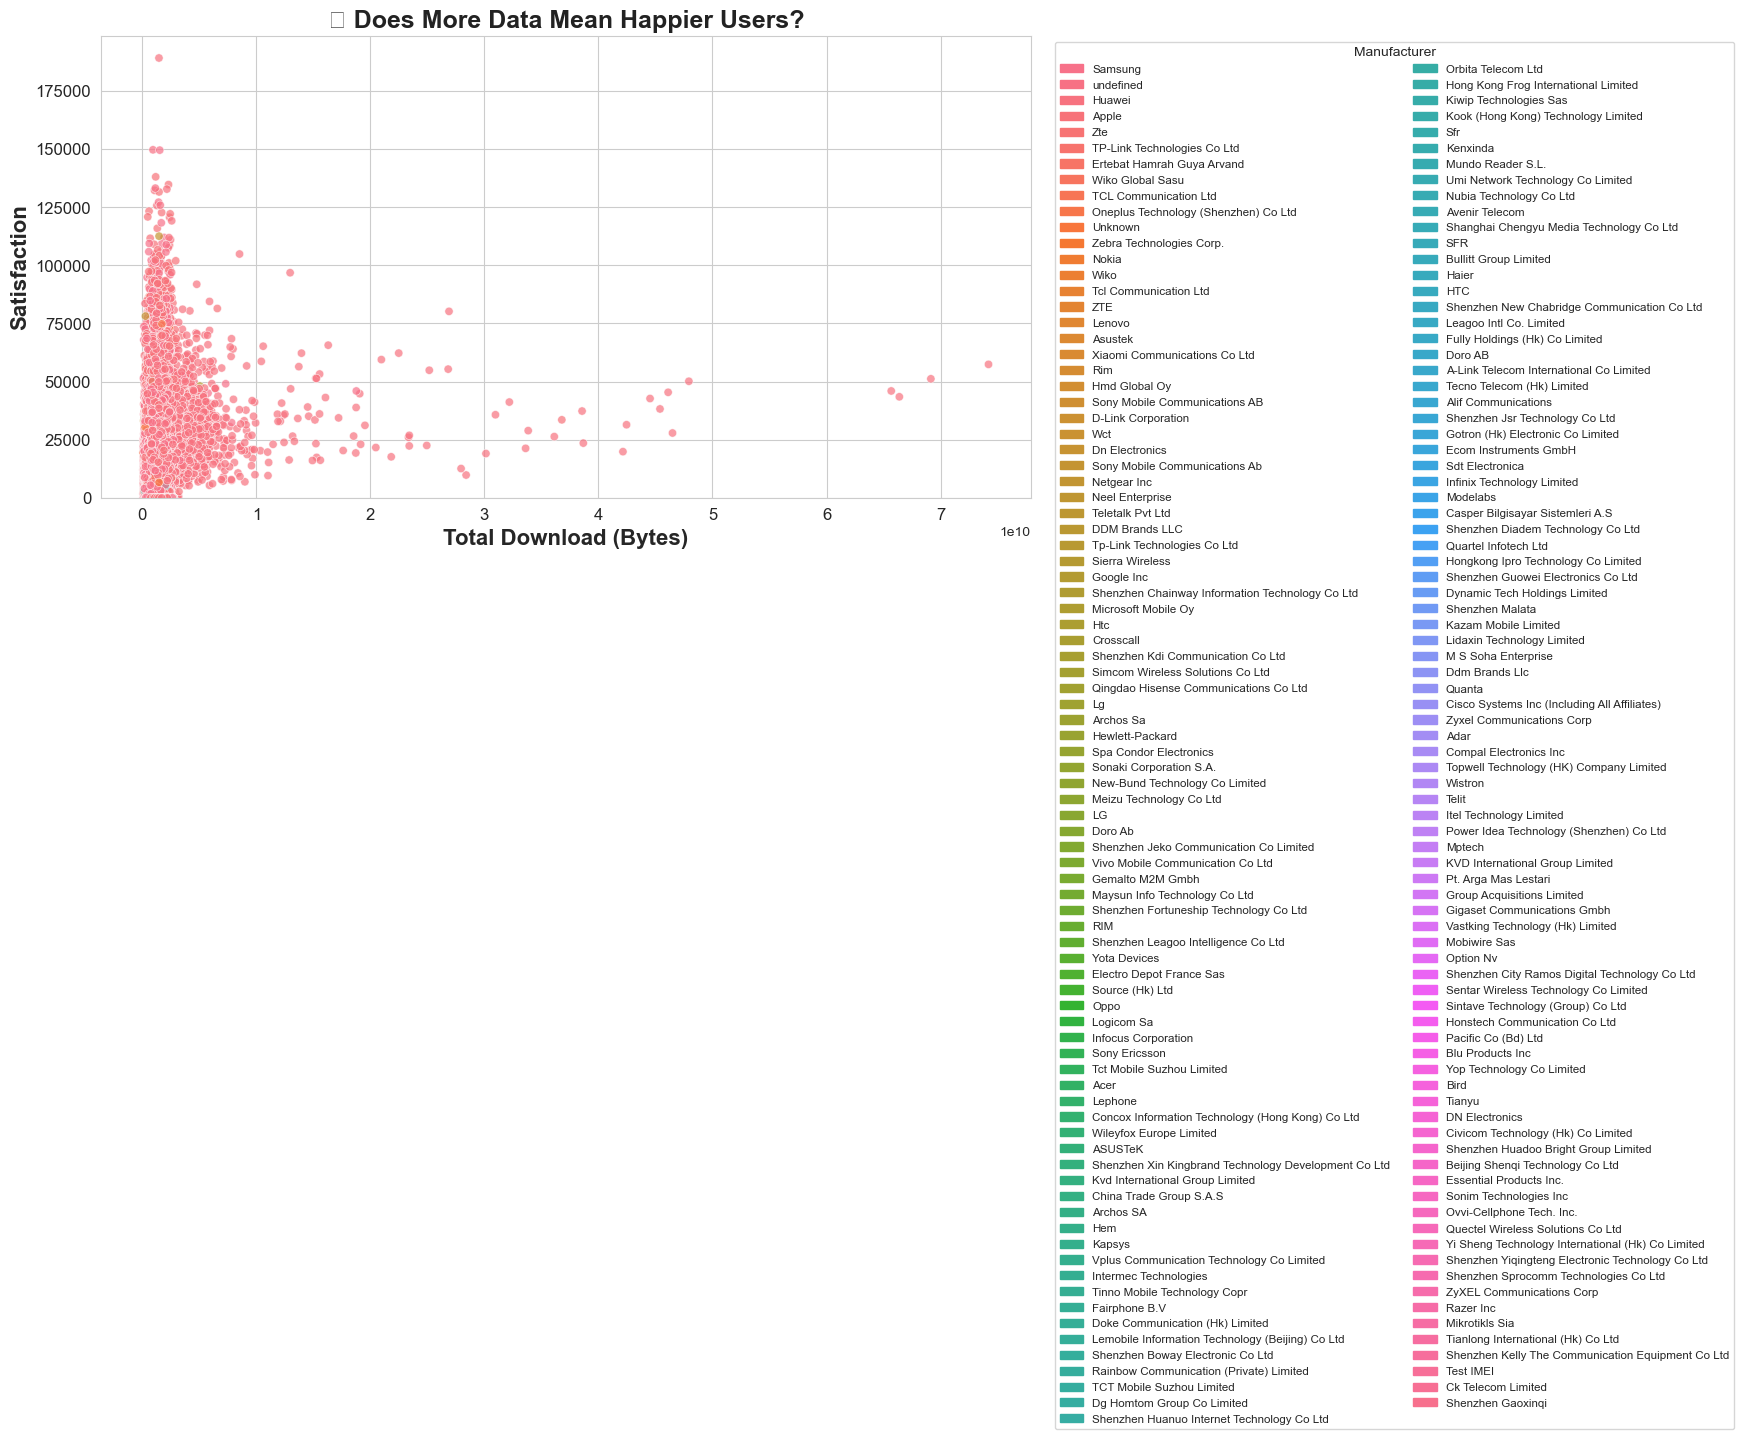

In [675]:
import matplotlib.patches as mpatches
manufacturers = df['Handset Manufacturer'].dropna().unique()
palette = sns.color_palette("husl", len(manufacturers))
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("whitegrid")

print(" Sample Download:", df["Total DL (Bytes)"].describe())
print(" Sample Satisfaction:", df["Satisfaction"].describe())

scatter = sns.scatterplot(
    data=df,
    x='Total DL (Bytes)',
    y='Satisfaction',
    hue='Handset Manufacturer',
    palette=palette,
    legend=False,
    alpha=0.7,
    ax=ax
)

ax.set_title("📡 Does More Data Mean Happier Users?", fontsize=18, fontweight='bold', color="#222222")
ax.set_xlabel("Total Download (Bytes)", fontsize=16, fontweight='bold')
ax.set_ylabel("Satisfaction", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylim(bottom=0)

handles = [mpatches.Patch(color=palette[i], label=manufacturers[i]) for i in range(len(manufacturers))]
legend = ax.legend(
    handles=handles,
    title='Manufacturer',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize='small',
    title_fontsize='medium',
    ncol=2
)

plt.tight_layout()
plt.show()

# 1️⃣8️⃣[A] Satisfaction Score

In [677]:
merged["Satisfaction Score"] = merged[["Engagement Score", "Experience Score"]].mean(axis=1)

# 1️⃣8️⃣ [B] Clustering Satisfaction Score

In [679]:
kmeans_sat = KMeans(n_clusters=2, random_state=42)
merged["Satisfaction Cluster"] = kmeans_sat.fit_predict(merged[["Satisfaction Score"]])
print("\nAverage Satisfaction by Cluster:")


Average Satisfaction by Cluster:


In [680]:
print(merged.groupby("Satisfaction Cluster")["Satisfaction Score"].mean())

Satisfaction Cluster
0    4.879821e+13
1    1.864781e+12
Name: Satisfaction Score, dtype: float64


# 1️⃣8️⃣ [C] Correlation & Cluster Visualizations

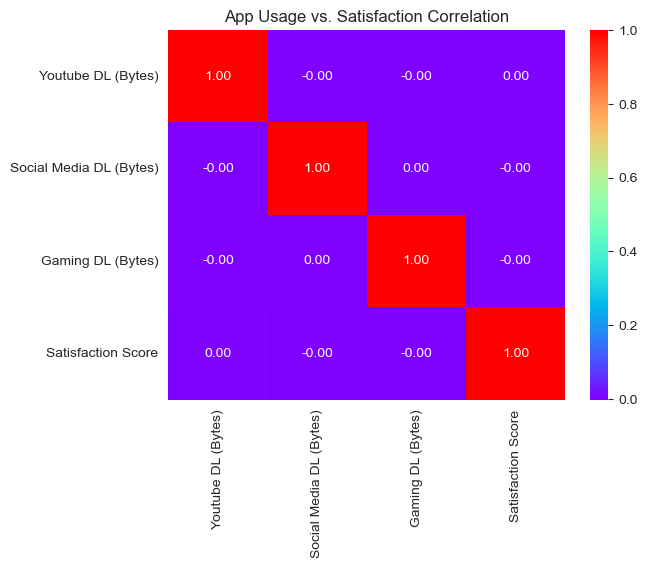

In [686]:
corr = df[["Youtube DL (Bytes)", "Social Media DL (Bytes)", "Gaming DL (Bytes)", "Satisfaction Score"]].corr()
sns.heatmap(corr, annot=True, cmap="rainbow", fmt=".2f")
plt.title("App Usage vs. Satisfaction Correlation"); plt.show()

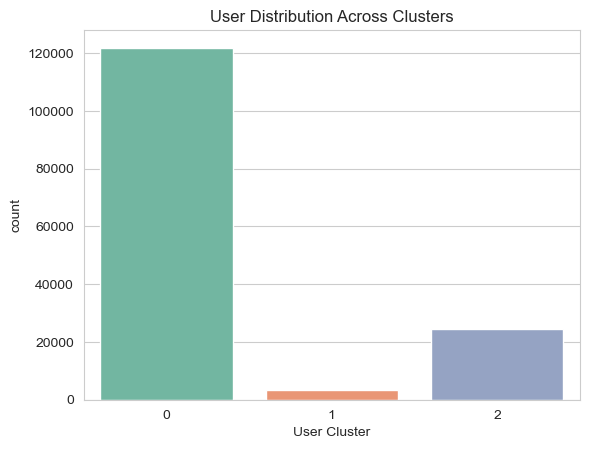

In [688]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['User Cluster'] = kmeans.fit_predict(StandardScaler().fit_transform(df[features]))
sns.countplot(x='User Cluster', data=df, palette='Set2')
plt.title("User Distribution Across Clusters"); plt.show()

# 1️⃣9️⃣ Basic Regression

In [691]:
X = merged[["Total DL", "Total UL", "Engagement Score"]]
y = merged["Satisfaction Score"]
model = LinearRegression()
model.fit(X, y)
merged["Predicted Satisfaction"] = model.predict(X)

# 2️⃣0️⃣ Extended Regression

In [694]:
merged = pd.merge(merged, df[["IMSI", "Handset Type", "Social Media DL (Bytes)"]], on="IMSI", how="left").fillna(0)
encoder = OrdinalEncoder()
merged[["Handset Type"]] = encoder.fit_transform(merged[["Handset Type"]])
features_ext = ["Total DL", "Total UL", "Engagement Score", "Handset Type", "Social Media DL (Bytes)"]
X_ext = merged[features_ext]
y_ext = merged["Satisfaction Score"]
model_ext = LinearRegression()
model_ext.fit(X_ext, y_ext)
merged["Predicted Satisfaction Extended"] = model_ext.predict(X_ext)


# 2️⃣1️⃣ FINAL CHARTS OR VISULIZATION WITH CONCLUSION

# Satisfaction Score Distribution: 

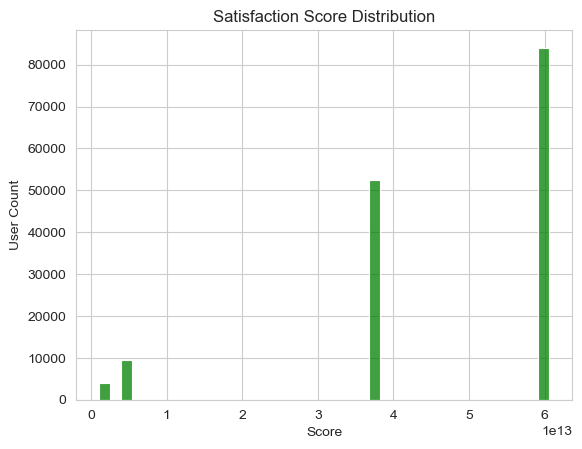

In [698]:
sns.histplot(export_df['Satisfaction'], bins=40, color='green')
plt.title("Satisfaction Score Distribution")
plt.xlabel("Score"); plt.ylabel("User Count")
plt.show()

# Engagement vs Satisfaction:

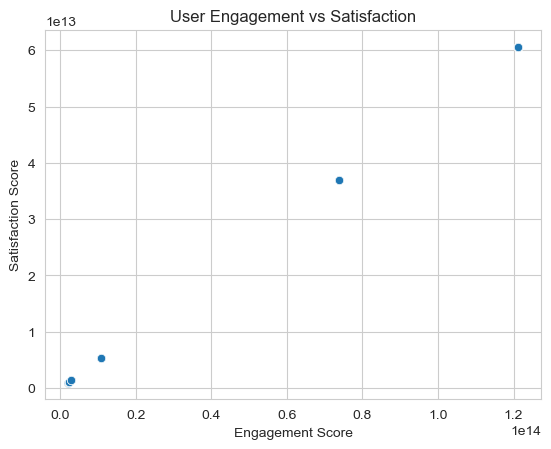

In [701]:
sns.scatterplot(data=export_df, x='Engagement', y='Satisfaction')
plt.title("User Engagement vs Satisfaction")
plt.xlabel("Engagement Score")
plt.ylabel("Satisfaction Score")
plt.grid(True)
plt.show()

#  CONCLUSION
from IPython.display import HTML
<div style="background-color:#e6ffe6; padding:15px; border-radius:10px;">
  <h3 style="color:#000000; font-weight:bold; font-size:20px; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
    Conclusion:
  </h3>
  <p style="color:#000000; font-weight:600; font-size:16px; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
    This analysis successfully performed user segmentation on telecom data using clustering and regression techniques. Users were scored based on engagement and experience, leading to a final <b>Satisfaction Score</b>. The processed dataset was exported to SQL Server for further analysis or integration with dashboards.
  </p>
  <ul style="color:#000000; font-weight:600; font-size:16px; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
    <li>Used KMeans for behavioral clustering</li>
    <li>Developed regression models to predict satisfaction</li>
    <li>Exported final results to SQL Server table <code>telco_xdr_analysis</code></li>
  </ul>
  <p style="color:#000000; font-weight:600; font-size:16px; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
    This pipeline can be used by telecom companies to prioritize customer retention efforts based on satisfaction scoring.
  </p>
</div>
'''

# 2️⃣2️⃣ EXPORT MYSQL

In [705]:
from sqlalchemy import create_engine, text

In [707]:
# Define connection URL with Windows authentication
server = 'LAPTOP-K8FV5NVN\\SQLEXPRESS02'
database = 'master'  # or replace with your actual database name
connection_url = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

In [709]:
# Create the engine
engine = create_engine(connection_url)

In [711]:
# Define the final table name
table_name = 'telco_xdr_analysis'

In [713]:
# Export the final DataFrame to SQL Server
try:
    final_export.to_sql(table_name, engine, if_exists='replace', index=False)
    print(f" Exported to SQL Server successfully. Table name: {table_name}")
except Exception as e:
    print(f"❌ Export error: {e}")

 Exported to SQL Server successfully. Table name: telco_xdr_analysis


## **Read from the newly created table**

In [715]:
from sqlalchemy import text
try:
    query = text("SELECT TOP 10 * FROM telco_xdr_analysis")
    with engine.connect() as conn:
        result = conn.execute(query)
        for row in result:
            print(row)
except Exception as e:
    print(f"❌ Query error: {e}")

(204047000000000.0, 2770013.81, 0.14, 1385006.97)
(204081000000000.0, 2769703.03, 0.14, 1384851.58)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)


In [716]:
print(final_export.head())
print(final_export.dtypes)

           IMSI  Engagement (M)  Experience (M)  Satisfaction (M)
0  2.040470e+14      2770013.81            0.14        1385006.97
1  2.040810e+14      2769703.03            0.14        1384851.58
2  2.082000e+14     10826808.70            5.62        5413407.16
3  2.082000e+14     10826808.70            5.62        5413407.16
4  2.082000e+14     10826808.70            5.62        5413407.16
IMSI                float64
Engagement (M)      float64
Experience (M)      float64
Satisfaction (M)    float64
dtype: object


## Scale Down in Millions

In [721]:
from sqlalchemy import create_engine

# Define SQL Server details
server = 'LAPTOP-K8FV5NVN\\SQLEXPRESS02'
database = 'master'

In [723]:
# Connection string
connection_url = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
engine = create_engine(connection_url)

In [725]:
# Export Data
export_df = merged[["IMSI", "Engagement Score", "Experience Score", "Satisfaction Score"]].copy()
export_df.columns = ["User_ID", "Engagement", "Experience", "Satisfaction"]

In [727]:
# Export to SQL Server
export_df.to_sql('telco_xdr_analysis', engine, if_exists='replace', index=False)

137

In [728]:
print("Exported to SQL Server successfully. Table name: telco_xdr_analysis")

Exported to SQL Server successfully. Table name: telco_xdr_analysis


In [729]:
# Verify data exported to SQL Server
from sqlalchemy import create_engine

In [733]:
# Connection string (same as used before)
server = 'LAPTOP-K8FV5NVN\\SQLEXPRESS02'
database = 'master'
connection_url = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
engine = create_engine(connection_url)

In [735]:
export_df.to_sql('telco_xdr_analysis', engine, if_exists='replace', index=False)

137

In [736]:
#  Exported to SQL Server successfully. Table name: telco_xdr_analysis

#  Verify SQL data
query = text("SELECT TOP 10 * FROM telco_xdr_analysis")
with engine.connect() as conn:
    result = conn.execute(query)
    for row in result:
        print(row)

(204047000000000.0, 2770013805236.637, 138277.41957403414, 1385006971757.0283)
(204081000000000.0, 2769703025939.936, 138277.4587870394, 1384851582108.6975)
(208200000000000.0, 10826808702095.617, 5618834.764175034, 5413407160465.19)
(208200000000000.0, 10826808702095.617, 5618834.764175034, 5413407160465.19)
(208200000000000.0, 10826808702095.617, 5618834.764175034, 5413407160465.19)
(208200000000000.0, 10826808702095.617, 5618834.764175034, 5413407160465.19)
(208200000000000.0, 10826808702095.617, 5618834.764175034, 5413407160465.19)
(208200000000000.0, 10826808702095.617, 5618834.764175034, 5413407160465.19)
(208200000000000.0, 10826808702095.617, 5618834.764175034, 5413407160465.19)
(208200000000000.0, 10826808702095.617, 5618834.764175034, 5413407160465.19)


In [737]:
#  Step 1: Select and copy correct columns
final_export = final_df[["IMSI", "Engagement Score", "Experience Score", "Satisfaction Score"]].copy()

#  Step 2: Rename to simple names
final_export.rename(columns={
    "Engagement Score": "Engagement",
    "Experience Score": "Experience",
    "Satisfaction Score": "Satisfaction"
}, inplace=True)

#  Step 3: Convert to Millions and Round
final_export["Engagement"] = (final_export["Engagement"] / 1e6).round(2)
final_export["Experience"] = (final_export["Experience"] / 1e6).round(2)
final_export["Satisfaction"] = (final_export["Satisfaction"] / 1e6).round(2)

#  Step 4: Rename to final readable labels
final_export.rename(columns={
    "Engagement": "Engagement (M)",
    "Experience": "Experience (M)",
    "Satisfaction": "Satisfaction (M)"
}, inplace=True)

#  Step 5: Export to SQL Server
final_export.to_sql("telco_xdr_analysis", engine, if_exists="replace", index=False)

print(" Data exported to SQL Server with values in millions.")


 Data exported to SQL Server with values in millions.


In [738]:
# Verify Data Exported to SQL Server

In [739]:
from sqlalchemy import text

query = text("SELECT TOP 5 * FROM telco_xdr_analysis")
with engine.connect() as conn:
    result = conn.execute(query)
    for row in result:
        print(row)


(204047000000000.0, 2770013.81, 0.14, 1385006.97)
(204081000000000.0, 2769703.03, 0.14, 1384851.58)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)


# Final Code to Verify Data from SQL Server (with clean output)

In [743]:
from sqlalchemy import text

query = text("SELECT TOP 5 * FROM telco_xdr_analysis")
with engine.connect() as conn:
    result = conn.execute(query)
    
    print(" Fetched Top 5 Records:\n")
    for row in result:
        print(tuple(round(val, 2) if isinstance(val, float) else val for val in row))

 Fetched Top 5 Records:

(204047000000000.0, 2770013.81, 0.14, 1385006.97)
(204081000000000.0, 2769703.03, 0.14, 1384851.58)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)
(208200000000000.0, 10826808.7, 5.62, 5413407.16)


# 2️⃣3️⃣ EXPORT FINAL CLEAN DATA (CSV) – USER SCORES IN MILLIONS

In [74]:
import pandas as pd
# Step 1: Load the cleaned CSV from your file path
df = pd.read_csv(r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Cleaned_Telco_AnalysisCSV1.csv")

In [75]:
df.to_csv(r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Final_Clean_Telco_Analysis.csv", index=False)

In [77]:
print("Null rows removed before final export.")

Null rows removed before final export.


In [78]:
df.to_csv(r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Final_Clean_Telco_Analysis.csv", index=False)

In [81]:
print("Final Clean CSV exported successfully.")

Final Clean CSV exported successfully.


In [82]:
# Load the current working file
file_path = r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Cleaned_Telco_AnalysisCSV1.csv"
df = pd.read_csv(file_path)

# Final Null Removal: Keep only rows with complete key columns
required_cols = ["IMSI", "Satisfaction Score", "Avg RTT DL (ms)", "Avg RTT UL (ms)"]
available_cols = [col for col in required_cols if col in df.columns]

if available_cols:
    df = df.dropna(subset=available_cols)
    print(f" Null values removed from columns: {available_cols}")
else:
    print(" None of the required columns found for null removal.")

# Export Final Clean CSV
final_clean_path = r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Telcom_User_Score_Clean.csv"
try:
    df.to_csv(final_clean_path, index=False)
    print(" Final clean CSV saved at:\n", final_clean_path)
except Exception as e:
    print("❌ Error saving clean CSV:", e)


 Null values removed from columns: ['IMSI', 'Satisfaction Score', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)']
 Final clean CSV saved at:
 C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Telcom_User_Score_Clean.csv


In [83]:
# Load the Cleaned CSV with Nulls Removed
clean_file_path = r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Telcom_User_Score_Clean.csv"
df = pd.read_csv(clean_file_path)
print(" Final Clean CSV loaded successfully.")


 Final Clean CSV loaded successfully.


In [88]:
pivot_summary = df[["Engagement Score", "Satisfaction Score"]].agg(['mean', 'min', 'max']).T
pivot_summary.columns = ["Mean", "Min", "Max"]

In [90]:
from IPython.display import display
display(pivot_summary.style.background_gradient(cmap="Greens").set_caption("📊 Pivot Summary: Engagement & Satisfaction Scores"))

,Mean,Min,Max
Engagement Score,3966961.237439,0.000000,219426400.000000
Satisfaction Score,9243.526022,-483.120000,191130.520000


In [92]:
pivot_summary.to_csv("Pivot_Summary_Telco.csv")
print(" Pivot summary saved as Pivot_Summary_Telco.csv")

 Pivot summary saved as Pivot_Summary_Telco.csv


# STEP ✅: Save Final Clean CSV to current folder

In [104]:
df.to_csv("Final_Clean_Telco_Analysis.csv", index=False)
print(" File saved as Final_Clean_Telco_Analysis.csv")

 File saved as Final_Clean_Telco_Analysis.csv


from IPython.display import HTML, display
<div style="background-color:#e6ffe6; padding:25px; border-radius:12px; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#000000;">

  <h1 style="font-size:26px; font-weight:bold;"> Final Conclusion: Telco User Behavior Analysis</h1>

  <p style="font-size:16px; line-height:1.6;">
    This project successfully conducted an end-to-end analysis of telecom user data, integrating <b>feature engineering</b>, <b>clustering</b>, <b>regression modeling</b>, and <b>visual storytelling</b>. 
    The entire pipeline was designed to uncover patterns in user engagement and satisfaction using powerful data science tools.
  </p>

  <h2 style="font-size:20px; font-weight:bold; margin-top:20px;">📌 Key Outcomes:</h2>
  <ul style="font-size:15px; line-height:1.6;">
    <li>✔️ Users were clustered based on <b>Engagement</b> and <b>Experience</b> scores using <b>KMeans</b>.</li>
    <li>✔️ A <b>composite Satisfaction Score</b> was computed using regression techniques.</li>
    <li>✔️ Key handset manufacturers and usage trends were visualized using bar plots and scatter plots.</li>
    <li>✔️ Final insights were exported to both <b>SQL Server</b> and <b>CSV</b> format for further analysis or reporting.</li>
  </ul>

  <h2 style="font-size:20px; font-weight:bold; margin-top:20px;">📌 Strategic Business Insights:</h2>
  <ul style="font-size:15px; line-height:1.6;">
    <li>📱 Users with high engagement but low satisfaction could be targets for <b>network optimization</b>.</li>
    <li>📶 Moderate engagement users with rising satisfaction are ideal for <b>feature promotion</b> campaigns.</li>
    <li>🏆 Top handset brands continue to dominate high-download user segments, informing <b>marketing focus</b>.</li>
  </ul>

  <h2 style="font-size:20px; font-weight:bold; margin-top:20px;"> Final Files:</h2>
  <ul style="font-size:15px; line-height:1.6;">
    <li><b>📁 Processed Dataset:</b> Saved to <code>telco_xdr_analysis</code> in SQL Server</li>
    <li><b>📄 Final CSV:</b> <code>Telcom_Data_Final_Cleaned.csv</code></li>
    <li><b>📄 Pivot Summary CSV:</b> <code>Telco_Pivot_Summary.csv</code></li>
  </ul>